# Sample Model

This notebook will run 2 sample models to enhance my idea: 
- xGBoost for Health-Aware Charging
- LSTM for Predictive Maintenance Scheduler

Daatset from Kaggle: [Battery Remaining Useful Life (RUL)](https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul)

### Prepare

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid")

In [54]:
df = pd.read_csv("Battery_RUL.csv")
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


### Visualization

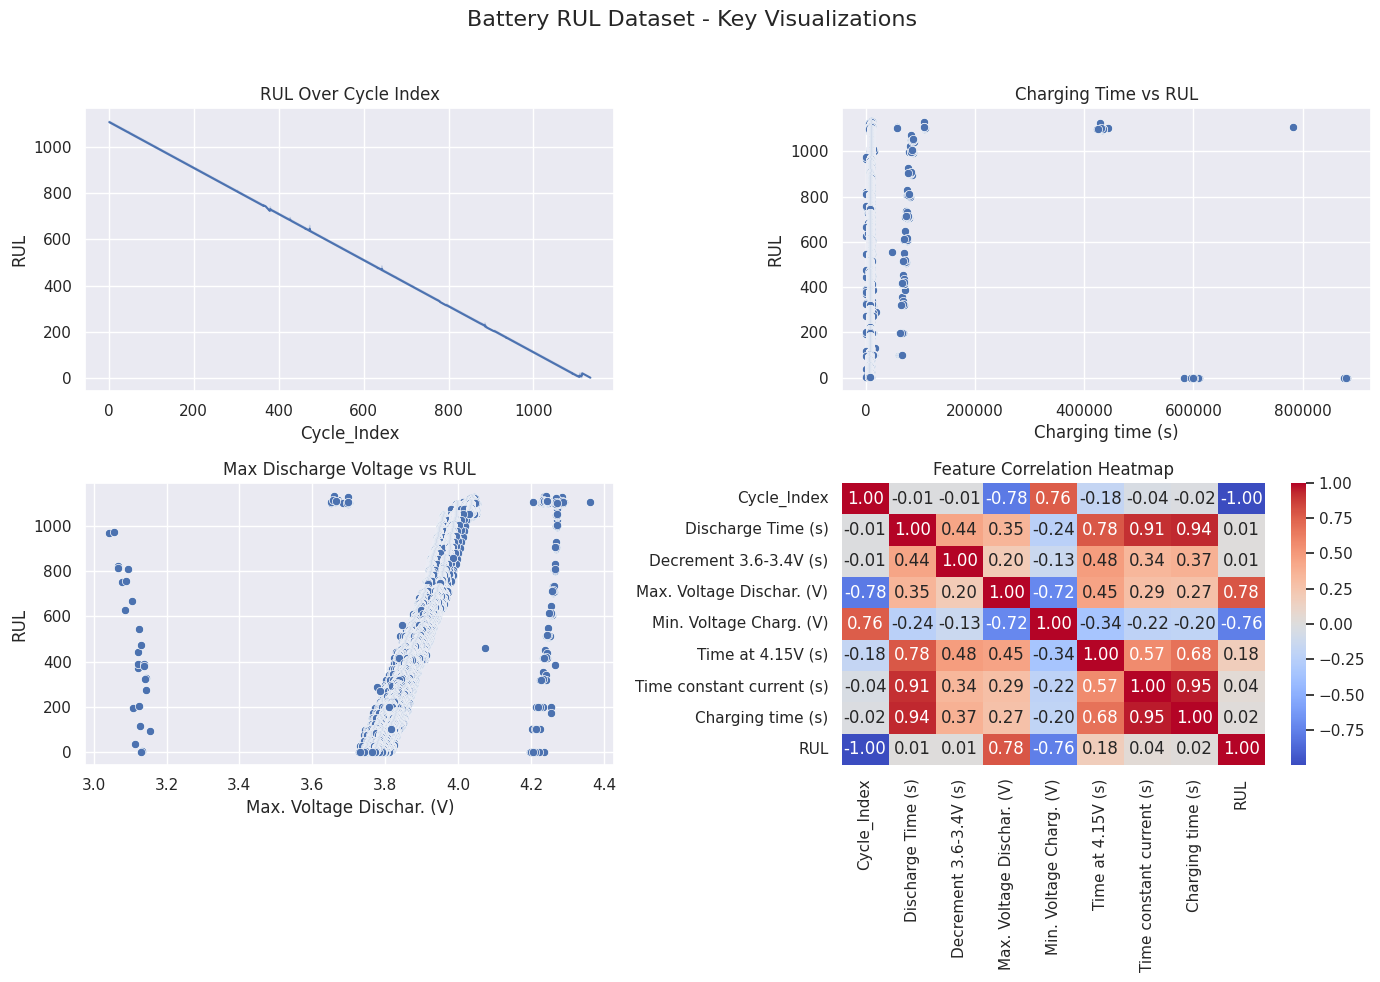

In [56]:
# Visualize the data
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle("Battery RUL Dataset - Key Visualizations", fontsize=16)

# Plot 1: RUL Over Cycle Index
sns.lineplot(data=df, x="Cycle_Index", y="RUL", ax=axs[0, 0])
axs[0, 0].set_title("RUL Over Cycle Index")
axs[0, 0].grid(True)

# Plot 2: Charging Time vs RUL
sns.scatterplot(data=df, x="Charging time (s)", y="RUL", ax=axs[0, 1])
axs[0, 1].set_title("Charging Time vs RUL")
axs[0, 1].grid(True)

# Plot 3: Max Discharge Voltage vs RUL (corrected column name)
sns.scatterplot(data=df, x="Max. Voltage Dischar. (V)", y="RUL", ax=axs[1, 0])
axs[1, 0].set_title("Max Discharge Voltage vs RUL")
axs[1, 0].grid(True)

# Plot 4: Correlation heatmap of numeric features
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axs[1, 1])
axs[1, 1].set_title("Feature Correlation Heatmap")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Modeling

#### Predictive Maintenance Scheduler

By applying xGBoost Model

In [57]:
# Start build xgboost model
x = df.drop(columns=["RUL"])
y = df["RUL"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the xGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"xGBoost Model Mean Squared Error: {rmse:.2f}")
print(f"xGBoost Model R^2 Score: {r2:.2f}")

xGBoost Model Mean Squared Error: 5.35
xGBoost Model R^2 Score: 1.00


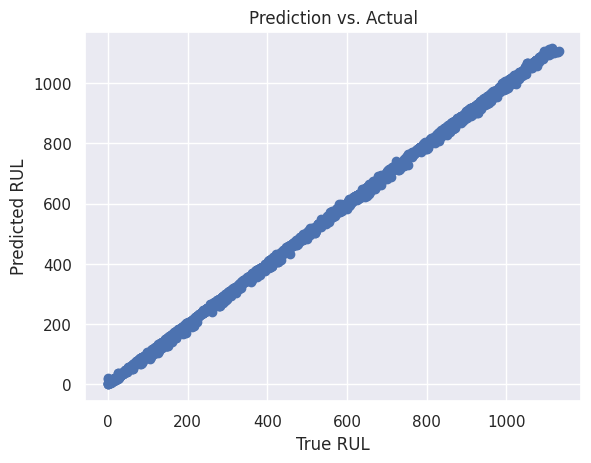

In [58]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Prediction vs. Actual")
plt.grid(True)
plt.show()


RMSE is 5.35, which means there are 5.35 RUL units off on average. R^2 is 1.0, the number is so perfect that it might be at risk of overfit. After I plot True vs Predecited, I see that it's an ideal line, so it seems like xGBoost is well-suited for this task. There is no risk of overfitting now.

#### Health-Aware Charging

By applying LSTM Model

In [59]:
# Normalize the data for LSTM
feature_cols = [col for col in df.columns if col != "RUL"]
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x = scaler_x.fit_transform(df[feature_cols])
y = scaler_y.fit_transform(df[["RUL"]])

# Time series data preparation
sequence_length = 10
x_seq, y_seq = [], []
for i in range(len(x) - sequence_length):
    x_seq.append(x[i:i+sequence_length])
    y_seq.append(y[i+sequence_length])
x_seq, y_seq = np.array(x_seq), np.array(y_seq)

# Split the data into training and testing sets
split = int(0.8 * len(x_seq))
x_train, x_test = x_seq[:split], x_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# Model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, x_seq.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,801 (81.25 KB)

 Trainable params: 20,801 (81.25 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Prediction
pred_y = model.predict(x_test)
pred_y_inv = scaler_y.inverse_transform(pred_y)
y_test_inv = scaler_y.inverse_transform(y_test)

# Evaluation
lstm_rmse = np.sqrt(np.mean((pred_y_inv - y_test_inv) ** 2))
lstm_r2 = r2_score(y_test_inv, pred_y_inv)

print(f"LSTM Model RMSE: {lstm_rmse:.2f}")
print(f"LSTM Model R^2 Score: {lstm_r2:.2f}")

Epoch 1/50


339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0991e-04 - val_loss: 9.7374e-06
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0991e-04 - val_loss: 9.7374e-06
Epoch 2/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7837e-05 - val_loss: 2.3950e-05
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7837e-05 - val_loss: 2.3950e-05
Epoch 3/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0001e-05 - val_loss: 1.4534e-05
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0001e-05 - val_loss: 1.4534e-05
Epoch 4/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3438e-05 - val_loss: 3.6291e-06
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3438e-05 - val_loss: 3.6291e-06
Epoch 5/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7146e-05 - val_loss: 6.0151e-05
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7146e-05 - val_loss: 6.0151e-05
Epoch 6/50
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3364e-05 

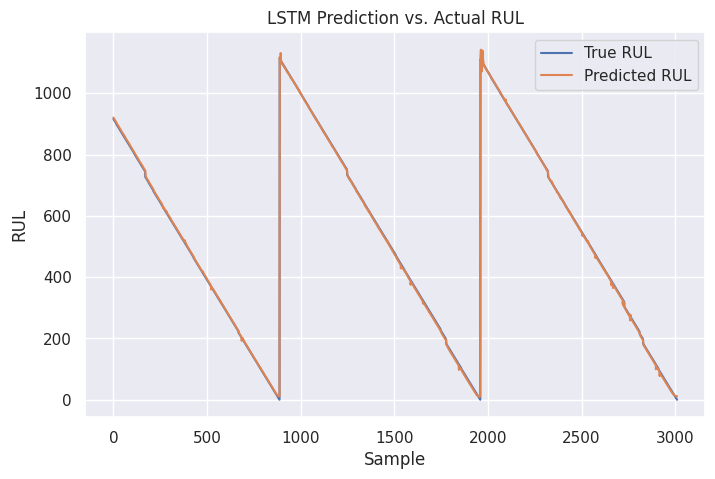

In [64]:
# Visualize
plt.figure(figsize=(8,5))
plt.plot(y_test_inv, label="True RUL")
plt.plot(pred_y_inv, label="Predicted RUL")
plt.title("LSTM Prediction vs. Actual RUL")
plt.xlabel("Sample")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.show()

The RMSE and R^2 result shows the LSTM model off by less than 4 cycles on average, and the plot is almost perfect, overall very accurate. 